# Bayesian eruption age estimation of the Los Chocoyos tuff

This Jupyter notebook replicates the results of [Baudry et al. 2024](https://doi.org/10.1016/j.epsl.2024.118826) using the eruption (/deposition) age estimation algorithm of [Keller, Schoene, and Samperton (2018)](https://doi.org/10.7185/geochemlet.1826) as implemented in [Chron.jl](https://github.com/brenhinkeller/Chron.jl) and [Isoplot.jl](https://github.com/JuliaGeochronology/Isoplot.jl).

Hint: `shift`-`enter` to run a single cell, or from the `Cell` menu select `Run All` to run the whole file. Any code from this notebook can be copied and pasted into the Julia REPL or a `.jl` script.
***

## (1) Load required Julia packages

In [1]:
# Load (and install if necessary) the Chron.jl package
using Chron
using Plots

## (2) Input datasets

In [2]:
ArAr = (;
    μ = [77.6224815743515, 78.0577708144378, 79.2211055152446, 82.198516247789, 83.1437324236049, 85.9087857538767, 87.0268100222348, 88.3049460707393, 89.0899002314099, 89.9460449272658, 91.1156291141794, 95.5731774848955, 95.9700673646351, 99.3887003674531, 99.511414114725, 100.859196752358, 103.234762480253, 104.003641988354, 105.320038705265, 105.705257543159, 106.854618379242, 107.138006679313, 107.914951831004, 109.09083729662, 109.54942364771, 109.551091822124, 111.346137268602, 113.136210748558, 116.395569311541, 118.115619792064, 119.265141132284, 119.572694413446, 119.611313091798, 121.387303267256, 121.723739583812, 123.380026282238, 123.58830273966, 124.788656105296, 124.834589032681, 124.843372818385, 125.505124320088, 126.985945071736, 127.133566301088, 127.833730245261, 128.363888661189, 130.652442155355, 132.39820528069, 133.703585672107, 134.260518790294, 134.376870051195, 135.534795305594, 136.676964948108, 136.824511317097, 137.483482489882, 138.158925992593, 138.605291319993, 138.920131564477, 140.167590942777, 140.718921043877, 140.880976373343, 144.067416259972, 144.624243815608, 145.131177621912, 145.300176052532, 148.525602623957, 150.308729209106, 151.121542892304, 152.253649237018, 154.503155474641, 160.493896696413, 163.72058586187, 166.2664547726, 170.715514152286, 174.990062484324, 175.362590100401, 178.495581141443, 178.899972839257, 181.275439537475, 186.597493100174, 188.377450159145, 188.576290780358, 190.833643146905, 193.084610830345, 193.984126678265, 194.975117017535, 195.18304948584, 195.314477865903, 197.502786030925, 201.269414353107, 202.610266348045, 203.005050217029, 203.089202858872, 203.685893366006, 215.211698107849, 215.473341405542, 219.351000512581, 227.35932834928, 227.830985688835, 228.156258481037, 233.505823977309, 235.049848274937, 236.433894942577, 240.753691190177, 244.971851047112, 257.115095817518, 258.445371859964, 259.034071690529, 259.937910657153, 263.570433009689, 272.500548608832, 273.128219846945, 286.294514755236, 291.54962043777, 299.382373622314, 311.962307956658, 312.690957612192, 318.861543431009, 391.182530642778],
    σ = [34.3337117038079, 27.82539351146, 27.7178637389546, 21.9020727157435, 20.5559976857858, 17.0772758589539, 39.5015932005398, 27.1688125562351, 27.8773518008182, 36.1377068552485, 23.2336119920512, 43.4058124411914, 19.9661679661522, 38.4638212372739, 22.1240143146418, 15.8779020662451, 27.0885847702835, 38.4822343649968, 34.1423967844353, 16.9514312276856, 23.4668521353037, 18.9433644809385, 40.8866747586302, 31.2435683987436, 16.9489451483324, 25.1621182465959, 34.2987141224267, 25.8164728306246, 27.8766758515403, 12.3460355863293, 40.0168777493699, 21.0732955866543, 30.4560233546637, 33.379737517131, 21.1951499807812, 16.2150582370567, 46.7005345531166, 38.0480160700535, 32.8530318882475, 14.0175569884378, 17.7667506064691, 9.74283326182656, 21.7674226689324, 39.9195764132898, 23.5427072151358, 23.2320107991633, 17.7340350208768, 34.1590029564641, 27.2419597325185, 14.5019907572114, 27.1124338585397, 27.9412143349969, 21.3682392037786, 15.2685897407315, 22.0454387771199, 37.1393477136469, 41.2191618261473, 65.6861334181295, 50.9721039076472, 15.0594174765731, 32.7017983046634, 14.8152061631065, 19.3711874114823, 19.075036698327, 40.2886359403072, 20.1730852876785, 19.9307397347367, 23.8087668366652, 24.2220462748263, 38.0482464769289, 14.1191033673652, 17.3864211846019, 15.8651869705648, 38.8137592781521, 21.7024078724299, 17.2701491605577, 21.9591186690815, 24.599956048782, 32.9876628346562, 17.8069390441046, 24.6471608107673, 15.7917548558264, 68.2583309016829, 24.4334989811993, 46.8529571051141, 22.002393183393, 41.3847315116941, 28.9511050406758, 25.8869946847958, 12.2070689632003, 25.781883011797, 24.6931334854545, 27.0796286697489, 30.5655107178219, 19.0420997568888, 51.9954019504773, 13.6579686619271, 28.7955018993034, 21.3209744025118, 27.2553946177565, 21.954134219563, 45.0356063467939, 43.3224333110554, 12.9127804157181, 48.2041867737271, 55.921445957226, 15.3461771980448, 16.0199381573701, 29.3358688746284, 19.7464046601251, 17.1638371279946, 25.6220333595493, 42.6261413541309, 9.34575237245345, 51.3370543744253, 21.2189100750998, 48.2397793779689, 77.0705726992345],
);

# Data from pumice zircon rims
BaudryUTh = (;
    μ = [48.00080842, 87.75397649, 89.77886671, 90.04416238, 90.15643133, 90.77281548, 91.1513568, 91.3883434, 91.46358689, 92.18717872, 92.78592761, 97.34935365, 97.40001788, 97.47346767, 97.96985905, 99.41537592, 99.46987208, 99.99153006, 100.3071013, 100.443453, 100.6077285, 101.7815121, 102.1828661, 102.4803365, 102.6493891, 104.11143, 104.2941774, 104.4686181, 105.6376061, 105.8451957, 106.2358437, 106.4119672, 107.3110701, 108.1122085, 108.8367488, 109.6492752, 113.2452596, 115.2441278, 118.0000172, 119.7069082, 120.4327006, 125.0453187, 125.6379926, 126.878779, 129.0523517, 130.9723156, 131.2945323, 133.1726187, 163.8410471, 175.7096157, 177.3877546, 250.0421852, 300.296264],
    σ = [66.75262966, 9.952988061, 11.08003764, 23.82389251, 7.95958414, 6.005866788, 7.939601419, 16.22574814, 7.35029744, 8.554185791, 8.178511386, 7.630072625, 10.26429955, 8.948523024, 10.48174451, 18.51851273, 8.810376888, 10.01168972, 12.71066789, 10.29184414, 12.11603537, 7.436062812, 8.771294158, 9.768813958, 15.25908461, 10.8317388, 8.589833761, 9.16942664, 8.599919383, 7.475682826, 14.91446678, 13.80216476, 11.2196426, 18.28726304, 11.24939196, 17.75955491, 16.36465461, 25.40339836, 25.47219055, 10.24220962, 10.06364686, 13.89153948, 11.88879494, 51.17602403, 27.95539501, 13.98998671, 14.78266599, 23.20961851, 70.85345755, 94.51963053, 32.72767152, 62.14306281, 139.4274561],
);

# Data from pumice zircon rims only
CisnerosUTh = (;
    μ = [81.544691467, 85.271075107, 86.309357075, 89.524077430, 89.882976190, 89.898431553, 90.112490620, 90.528110007, 91.367540069, 92.607043806, 93.800912188, 92.851070132, 93.275391613, 94.643657399, 95.305515443, 95.157284898, 96.090661585, 96.205768174, 97.303477647, 97.929345225, 100.215551136, 100.203789791, 101.824752121, 102.766156313, 103.931596423, 103.944603557, 103.954116364, 106.285543299, 105.812982187, 108.630639904, 108.233217023, 108.158361211, 112.006250988, 109.832180163, 110.266654042, 110.903509620, 111.374890828, 112.903342614, 117.453364969, 116.420736140, 117.573024049, 119.316013597, 119.123310443, 119.173612558, 119.622777905, 123.464249438, 123.214888917, 125.954854952, 130.668594550, 140.970318206, 143.218754737, 152.310742161, 192.574774890, 200.422257498, 83.161434597, 88.009534912, 91.922817648, 92.943896982, 93.529407421, 95.586317067, 98.481028154, 98.793016980, 101.168216895, 103.773826477, 102.882021688, 105.489322572, 107.097464443, 108.984362925, 110.212138525, 111.732340101, 113.187685170, 113.404373089, 114.928468223, 115.508217775, 129.514452151, 139.275204849, 145.828510607, 158.631647421],
    σ = [12.869706018, 10.399487114, 12.539517362, 16.363942701, 13.086449249, 17.248053792, 12.140039452, 11.755035809, 39.403067228, 16.828350462, 13.554354524, 6.341294618, 27.261664844, 10.652604747, 6.135803114, 7.340705450, 10.903805750, 11.644332421, 9.209316763, 7.860852839, 16.827512333, 15.870547184, 13.452441772, 12.045247390, 15.860344463, 8.235254884, 15.256084360, 12.791648728, 22.336936998, 21.325444761, 7.802288991, 8.419122879, 16.878411304, 16.883354898, 8.734340602, 8.453604092, 15.734017480, 18.315242784, 14.640351089, 13.761963902, 26.525848396, 10.834553003, 9.910254926, 17.895174277, 23.768839071, 11.833451695, 15.859492604, 25.859622508, 29.475114458, 20.131525590, 21.088808980, 25.623437741, 25.364850790, 52.312180670, 9.113126158, 8.062264334, 8.472564608, 6.461482178, 6.301998136, 7.428852335, 7.496089176, 9.917137263, 9.416585036, 7.100249637, 12.439042003, 18.189504018, 11.855608728, 13.471588058, 8.444616911, 11.348200596, 18.372321001, 9.666991176, 16.960581105, 11.284262081, 11.602825264, 50.535051585, 20.879572764, 22.951634385],
);

## (3) Set up eruption age estimates

In [3]:
N = 10^7
burnin = 10^4
binedges = 80:0.1:130

# Some functions we'll use later for plotting
stepify(x::AbstractVector) = vec(vcat(x', x'))
stepifyedges(x::AbstractVector) = vec(vcat(x[1:end-1]', x[2:end]'))

stepifyedges (generic function with 1 method)

## (4) Run MCMC to estimate eruption ages

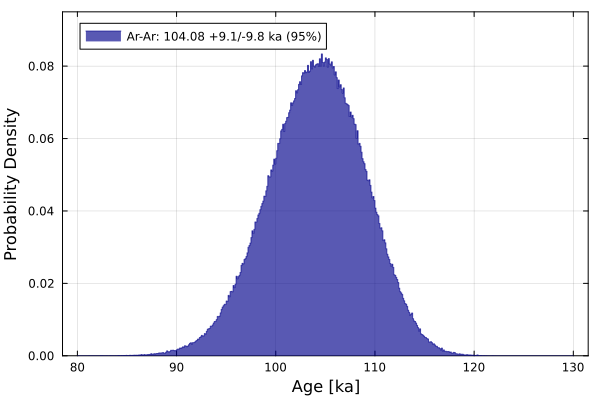

In [4]:
# Ar-Ar
ArArdist = metropolis_min(N, ExponentialDistribution, ArAr.μ, ArAr.σ; burnin)
teruptArAr = CI(ArArdist)
## --- Plot results
ArArbincounts = histcounts(ArArdist, binedges)
ArArbindensity = ArArbincounts ./ (sum(ArArbincounts)*step(binedges)) # Normalize
hArAr = plot(stepifyedges(binedges), stepify(ArArbindensity), fill=true, xlabel="Age [ka]", ylabel="Probability Density", label="Ar-Ar: $teruptArAr ka (95%)", framestyle=:box, color=:darkblue, alpha=0.65, legend=:topleft)
ylims!(0, 0.095)
savefig(hArAr, "ArAr.pdf")
display(hArAr)


[ Info: Baudry U-Th: 98.18 +4.9/-7.0 (95% CI)
[ Info: Cisneros U-Th: 95.88 +6.4/-6.3 (95% CI)


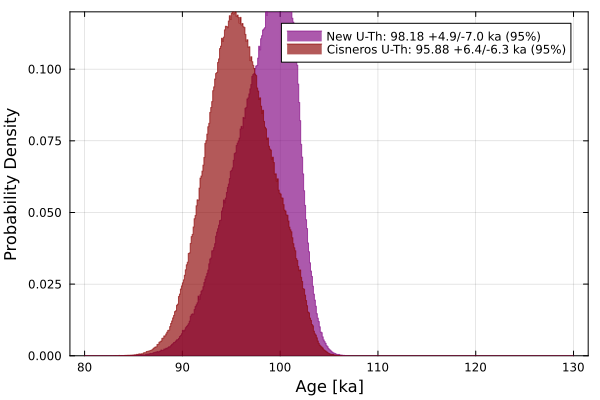

In [5]:
## --- Baudry U-Th
BaudryUThdist = metropolis_min(N, HalfNormalDistribution, BaudryUTh.μ, BaudryUTh.σ; burnin)
teruptBaudryUTh = CI(BaudryUThdist)
@info "Baudry U-Th: $teruptBaudryUTh (95% CI)"

## --- Plot results
BaudryUThbincounts = histcounts(BaudryUThdist, binedges)
BaudryUThbindensity = BaudryUThbincounts ./ (sum(BaudryUThbincounts)*step(binedges)) # Normalize
hUTh = plot(stepifyedges(binedges), stepify(BaudryUThbindensity), fill=true, xlabel="Age [ka]", ylabel="Probability Density", label="New U-Th: $teruptBaudryUTh ka (95%)", framestyle=:box, color=:purple, alpha=0.65, legend=:topright)

## --- Cisneros U-Th
CisnerosUThdist = metropolis_min(N, HalfNormalDistribution, CisnerosUTh.μ, CisnerosUTh.σ; burnin)
teruptCisnerosUTh = CI(CisnerosUThdist)
@info "Cisneros U-Th: $teruptCisnerosUTh (95% CI)"

## --- Plot results
CisnerosUThbincounts = histcounts(CisnerosUThdist, binedges)
CisnerosUThbindensity = CisnerosUThbincounts ./ (sum(CisnerosUThbincounts)*step(binedges)) # Normalize
hCisnerosUTh = plot!(hUTh, stepifyedges(binedges), stepify(CisnerosUThbindensity), fill=true, xlabel="Age [ka]", ylabel="Probability Density", label="Cisneros U-Th (pumice zircon rims only): $teruptCisnerosUTh ka (95%)", framestyle=:box, color=:darkred, alpha=0.65)
ylims!(0,0.12)
savefig(hUTh, "UTh.pdf")
display(hUTh)

## (5) Combine results

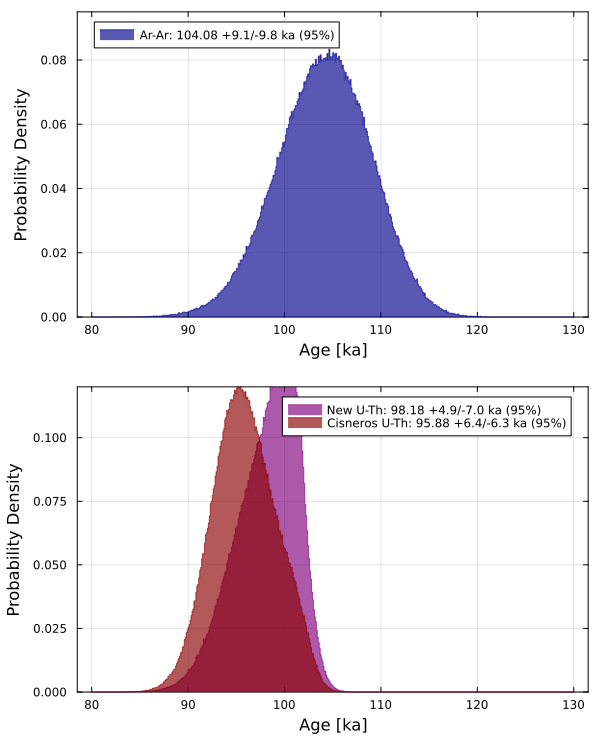

In [6]:
## --- Plot combined results

h = plot(hArAr, hUTh, layout=(2,1), size=(600,750), leftmargin=(3,:mm))
savefig(h, "combined.pdf")
display(h)

In [7]:
## --- Analytical error propagation

@info "Ar-Ar: $(teruptArAr.mean) ± $(2*teruptArAr.sigma) (2-sigma)\n"

μUTh, σUth, mswd = wmean([teruptBaudryUTh.mean, teruptCisnerosUTh.mean], [teruptBaudryUTh.sigma, teruptCisnerosUTh.sigma], corrected=true)
@info "Combined U-Th: $μUTh ± $(2σUth) (2-sigma)"

μ, σ, mswd = wmean([teruptArAr.mean, μUTh], [teruptArAr.sigma, σUth], corrected=true)
@info "Combined overall: $μ ± $(2σ) (2-sigma)"


[ Info: Ar-Ar: 104.08318984720643 ± 9.696321676932945 (2-sigma)
[ Info: Combined U-Th: 97.08300752510887 ± 4.5562483023097515 (2-sigma)
[ Info: Combined overall: 98.34909953209018 ± 5.388835093144951 (2-sigma)


In [8]:
## --- Monte Carlo error propagation, including decay constant uncertainties

# First combine U-Th distributions
UThdist = distwmean(BaudryUThdist, CisnerosUThdist)

# Have to convert from ka to Ma and back for systematic uncertainty functions
combindeddist = distwmean(add_systematic_uncert_UTh(UThdist/1000)*1000, add_systematic_uncert_ArAr(ArArdist/1000, constants=:Min)*1000, corrected=false)
terupt = CI(combindeddist)
@info "Combined, Monte Carlo, including decay constants: $(terupt.mean) +$(terupt.upper-terupt.mean)-/$(terupt.mean-terupt.lower) (95% CI)\n"

[ Info: Combined, Monte Carlo, including decay constants: 99.30771177540034 +5.352614667356562-/5.743136616239013 (95% CI)


***